<a href="https://colab.research.google.com/github/AMIT110409/Deep_learning_Algo_implementation/blob/main/Gradient_descent_and_its_types_and_memoization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# fib
import time
def fib(n,d):
  if n in d:
    return d[n]
  else:
    d[n] = fib(n-1,d) + fib(n-2,d)
    return d[n]

In [7]:
start = time.time()
d = {0:1,1:1}
fib(100,d)
print(time.time() - start)

0.00023818016052246094


In [1]:
import numpy as np
import pandas as pd
import time


In [5]:
df = pd.read_csv('user_dataset.csv')

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,7423388,Male,34,61214,0
1,7550634,Female,19,85271,0
2,5304572,Male,19,59064,1
3,3234489,Male,45,85091,1
4,8204212,Male,40,55818,0


In [7]:
df = df[['Age','EstimatedSalary','Purchased']]


In [8]:
df.head()

,Age,EstimatedSalary,Purchased
0,34,61214,0
1,19,85271,0
2,19,59064,1
3,45,85091,1
4,40,55818,0


In [9]:
X  = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [10]:
X

,Age,EstimatedSalary
0,34,61214
1,19,85271
2,19,59064
3,45,85091
4,40,55818
...,...,...
95,50,83027
96,31,95135
97,38,34508
98,37,18051


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [14]:
X_train.shape

(80, 2)

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [16]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))    ## here we have one input layer two h hidden layer and one output layer .



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
start = time.time()
history = model.fit(X_train,y_train,epochs=10,batch_size=320) ## it is batch gradient  descent . here batch size is equal to n no of rows .
print(time.time() - start)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step - accuracy: 0.5375 - loss: 4356.5342
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5375 - loss: 4211.3154
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5375 - loss: 4066.2788
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5375 - loss: 3921.4250
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5375 - loss: 3776.7603
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5375 - loss: 3632.2827
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5375 - loss: 3487.9946
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5375 - loss: 3343.8938
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5375 - loss: 3199.9827
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5375 - loss: 3056.2559
1.1507933139801025


In [19]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
start = time.time()
history = model.fit(X_train,y_train,epochs=10,batch_size=1)  #3 it is  stochastic  gradient descent .  here batch size is 1 .
print(time.time() - start)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5468 - loss: 1552.5184  
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3995 - loss: 60.3997  
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4274 - loss: 31.4566  
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5334 - loss: 40.7823  
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3345 - loss: 45.0301  
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4964 - loss: 81.4073
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5766 - loss: 129.5189
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4893 - loss: 67.2928
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4896 - loss: 38.9990
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4354 - loss: 82.9338
2.1150710582733154


In [21]:
X_scaled.shape

(100, 2)

In [23]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=320,validation_split=0.2)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step - accuracy: 0.5000 - loss: 0.6758 - val_accuracy: 0.7000 - val_loss: 0.6677
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5000 - loss: 0.6752 - val_accuracy: 0.7000 - val_loss: 0.6681
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.5000 - loss: 0.6746 - val_accuracy: 0.7000 - val_loss: 0.6685
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5250 - loss: 0.6740 - val_accuracy: 0.7000 - val_loss: 0.6690
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5250 - loss: 0.6733 - val_accuracy: 0.7000 - val_loss: 0.6695
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5375 - loss: 0.6727 - val_accuracy: 0.7000 - val_loss: 0.6700
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5625 - loss: 0.6722 - val_accuracy: 0.7000 - val_loss: 0.6704
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.5750 - loss: 0.6716 - val_accuracy: 0.7500 - val_loss: 0.67

In [24]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=1,validation_split=0.2)


Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5543 - loss: 0.6650 - val_accuracy: 0.5500 - val_loss: 0.6760
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5749 - loss: 0.6822 - val_accuracy: 0.5500 - val_loss: 0.6785
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5053 - loss: 0.6864 - val_accuracy: 0.5500 - val_loss: 0.6801
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5381 - loss: 0.6799 - val_accuracy: 0.5500 - val_loss: 0.6824
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6114 - loss: 0.6700 - val_accuracy: 0.5500 - val_loss: 0.6839
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5543 - loss: 0.6646 - val_accuracy: 0.5500 - val_loss: 0.6845
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4498 - loss: 0.7225 - val_accuracy: 0.5500 - val_loss: 0.6863
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6285 - loss: 0.6638 - val_accuracy: 0.5500 - val_loss:

In [25]:
# so here above e we perform this for checking the faster convergence  .
# so stochastic is faster convergence then  batch GD . because if we talk about time
# so batch is faster because it take less time .
#but  stochastic at each epochs  do more weight update so that not need full epochs to update the weights .
# so in epochs it update the weights .

In [26]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=500,batch_size=1,validation_split=0.2)


Epoch 1/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5575 - loss: 0.6690 - val_accuracy: 0.5500 - val_loss: 0.6862
Epoch 2/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6609 - loss: 0.6325 - val_accuracy: 0.5500 - val_loss: 0.6882
Epoch 3/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6489 - loss: 0.6616 - val_accuracy: 0.6000 - val_loss: 0.6920
Epoch 4/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6516 - loss: 0.6076 - val_accuracy: 0.5500 - val_loss: 0.6900
Epoch 5/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6854 - loss: 0.6316 - val_accuracy: 0.6000 - val_loss: 0.6934
Epoch 6/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5428 - loss: 0.6771 - val_accuracy: 0.5500 - val_loss: 0.6920
Epoch 7/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5864 - loss: 0.6391 - val_accuracy: 0.6000 - val_loss: 0.6975
Epoch 8/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5775 - loss: 0.6198 - val_accuracy: 0.6000 - v

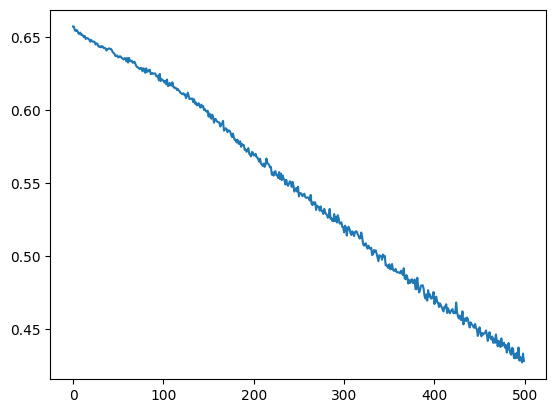

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [28]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=500,batch_size=400,validation_split=0.2)


Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step - accuracy: 0.8250 - loss: 0.4125 - val_accuracy: 0.5000 - val_loss: 1.0853
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.8125 - loss: 0.4116 - val_accuracy: 0.5000 - val_loss: 1.0840
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8125 - loss: 0.4110 - val_accuracy: 0.5000 - val_loss: 1.0833
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.8125 - loss: 0.4105 - val_accuracy: 0.5000 - val_loss: 1.0834
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8125 - loss: 0.4102 - val_accuracy: 0.5000 - val_loss: 1.0844
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8125 - loss: 0.4101 - val_accuracy: 0.5000 - val_loss: 1.0857
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.8125 - loss: 0.4099 - val_accuracy: 0.5000 - val_loss: 1.0871
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8125 - loss: 0.4097 - val_accuracy: 0.5000 - val_l

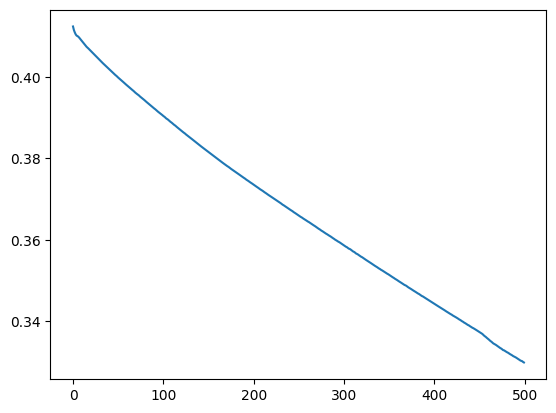

In [29]:
plt.plot(history.history['loss'])  # So in batch GD
#their is no jaggerness in loss function grapg it is smooth deacrease  but in stochastic GD   their is jagger ness we have in graph .
